# JPL Horizons Ephemeris Plots


 <p>AstroQuery provides convenient way to produce an Ephemeris for a solar system object.  Docs are on at #https://astroquery.readthedocs.io/en/latest/ 
 </p>
 <p>Astroquery for Horizons docs are at https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html  </p>
 <p>Each cell below can be executed by selecting it and entering <b>Control-Enter</b> </p>
 


<p><b>Horizons</b> is the astro query target </p>
<p><b>obj</b> is the object returned by the Horizons web server.</p>
<p><b>eph</b> is the ephemeris associated with the query return. eph is a table of row and column values. The first line gives the column headers. </p>

<p>The ephemeris object can be saved in several formats for offline processing. </p> 
<p>Example:
<pre>
eph.write('ephem.html', format='jsviewer')
eph.write('ephem.csv', format='csv')
eph.write('ephem.txt', format='ascii')
eph.write('ephem.fits', format='fits')
eph.write('ephem.xml', format='votable')
eph.write('ephem.tex', format='latex')
</pre>
</p>

In [2]:
#https://astroquery.readthedocs.io/en/latest/
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
obj = Horizons(id='C/2019 D1', location='H47',epochs={'start':'2019-06-15', 'stop':'2019-07-30','step':'3h'} )
eph = obj.ephemerides()


Data arrays can be retrieved from the object ephemerides by calling the column name. 
They are astropy tables. http://docs.astropy.org/en/stable/table/index.html
<p> examples: 
    <ul> r = eph.columns[eph.index_column('r')] </ul>
</p>
<p> <ul> delta = eph.columns[eph.index_column('delta')] </ul>
</p>
<p>Data arrays can easily be plotted with matplotlib.</p>


<Figure size 432x288 with 0 Axes>

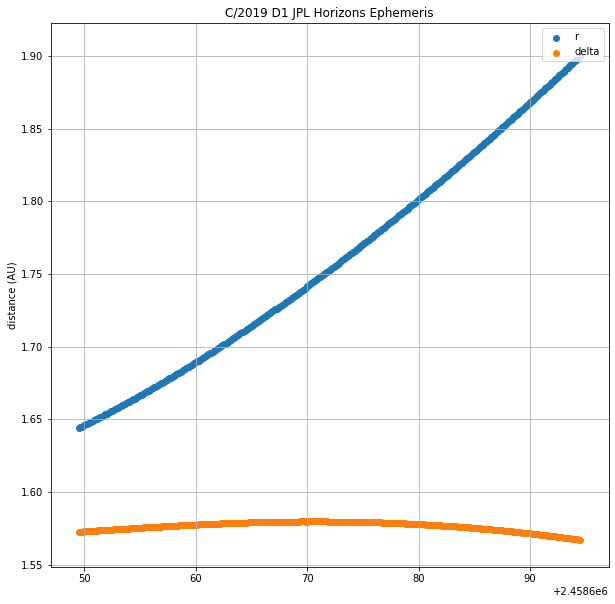

In [9]:
jd = eph.columns[eph.index_column('datetime_jd')]
r = eph.columns[eph.index_column('r')]
delta = eph.columns[eph.index_column('delta')]
# Plot elongation versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(jd, r, label='r')
plt.scatter(jd, delta, label='delta')
plt.ylabel('distance (AU)')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-r and delta.png')
plt.show()


<p>JPLhorizons ephemeris parameters <b>T-mag</b>  and <b>N-mag</b> are JPL's estimated total and nuclear magnitudes. This plot shows that that the comet's total magnitude is 2 to 3 magnitudes brighter than nuclear magnitude. Horizons documentation provides the method of how these quantities are calculated.</p>

https://ssd.jpl.nasa.gov/?horizons_doc#specific_quantities

<pre>T-mag N-mag = Comet's approximate apparent visual total magnitude ("T-mag") and nuclear magnitude ("N-mag") by following standard IAU definitions:
    T-mag =  M1 + 5*log10(delta) + k1*log10(r)
    N-mag =  M2 + 5*log10(delta) + k2*log10(r) + phcof*beta
   Units: MAGNITUDES</pre>
   <p>beta is phase</p> 
   <p>phcof is phase coefficient</p>
 The quantities M1, M2, k1, k2, phcof are returned in the returned ephemeris in  their own columns. 
 
 

<Figure size 432x288 with 0 Axes>

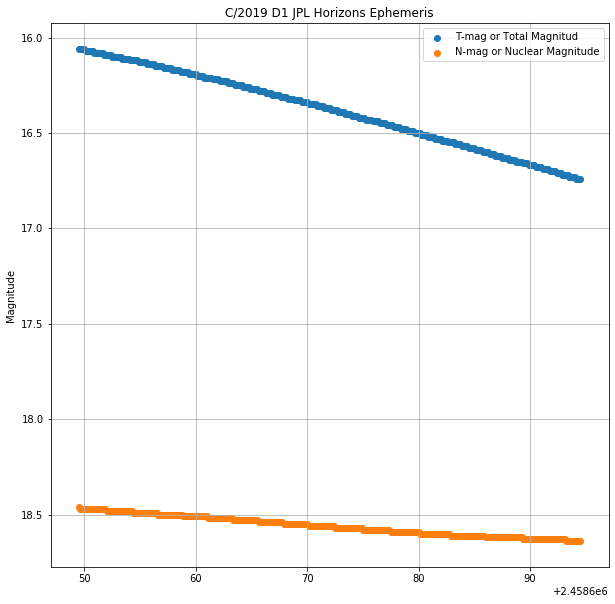

In [12]:
jd = eph.columns[eph.index_column('datetime_jd')]
tmag = eph.columns[eph.index_column('Tmag')]
nmag = eph.columns[eph.index_column('Nmag')]
# Plot Tmag and Nmag versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
# invert magnitude axis since brightness increases with decreasing magnitude 
plt.gca().invert_yaxis()

plt.scatter(jd, tmag, label='T-mag or Total Magnitud')
plt.scatter(jd, nmag, label='N-mag or Nuclear Magnitude')
plt.ylabel('Magnitude ')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-Tmag and Nmag.png')
plt.show()

<Figure size 432x288 with 0 Axes>

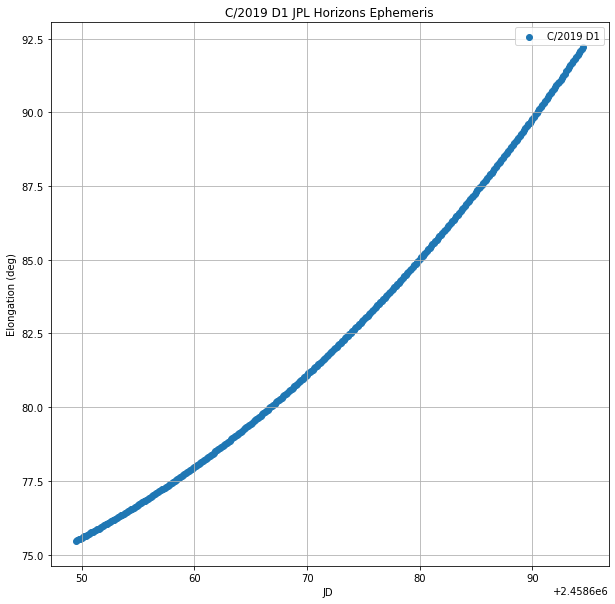

In [3]:
jd = eph.columns[eph.index_column('datetime_jd')]
elong = eph.columns[eph.index_column('elong')]
# Plot elongation versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(jd, elong, label='C/2019 D1')
plt.xlabel('JD ')
plt.ylabel('Elongation (deg)')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-elong.png')
plt.show()


<Figure size 432x288 with 0 Axes>

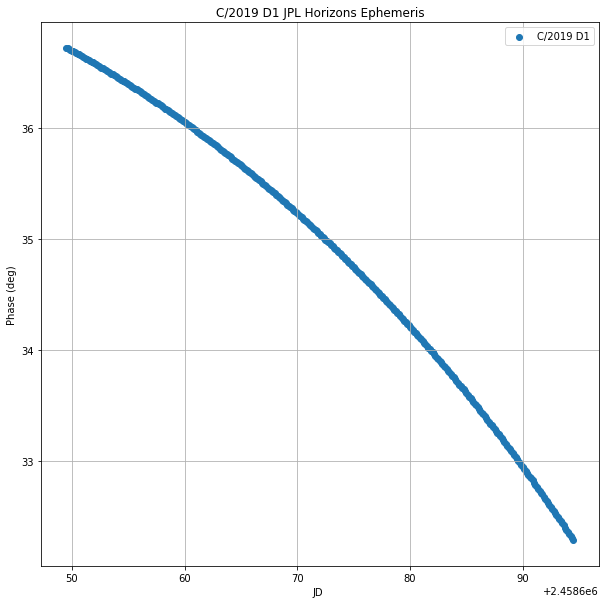

In [5]:
jd = eph.columns[eph.index_column('datetime_jd')]
phase = eph.columns[eph.index_column('alpha')]
# Plot alpha versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(jd, phase, label='C/2019 D1')
plt.xlabel('JD ')
plt.ylabel('Phase (deg)')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-phase.png')
plt.show()


<Figure size 432x288 with 0 Axes>

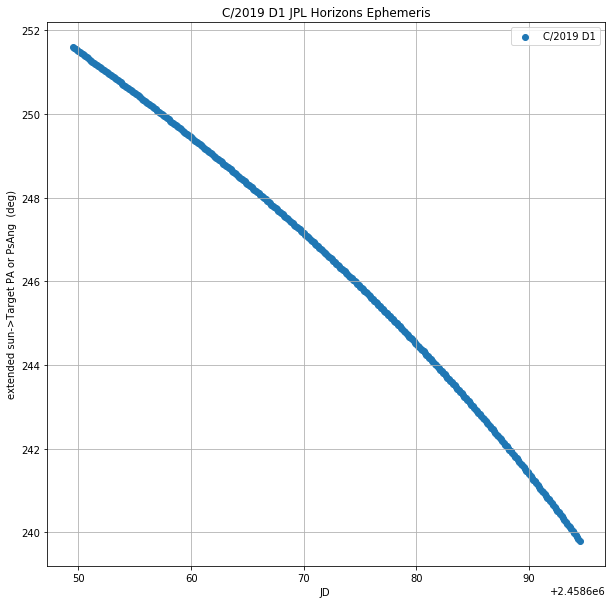

In [6]:
jd = eph.columns[eph.index_column('datetime_jd')]
psang = eph.columns[eph.index_column('sunTargetPA')]
# Plot sunTargetPA versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(jd, psang, label='C/2019 D1')
plt.xlabel('JD ')
plt.ylabel('extended sun->Target PA or PsAng  (deg)')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-psang.png')
plt.show()


<Figure size 432x288 with 0 Axes>

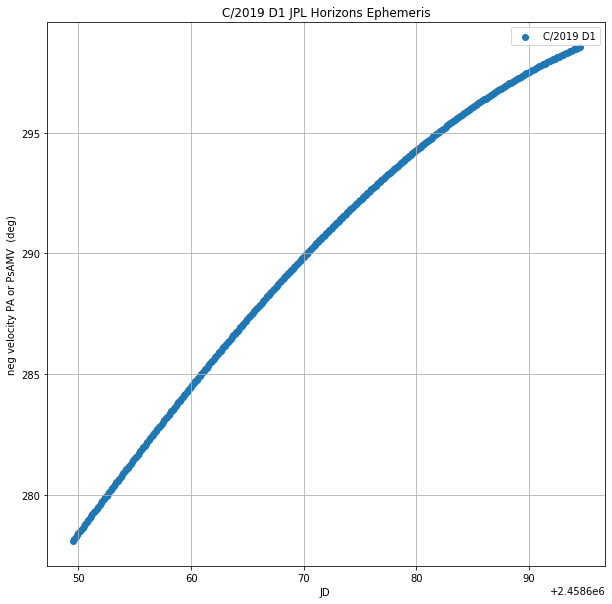

In [7]:
jd = eph.columns[eph.index_column('datetime_jd')]
psamv = eph.columns[eph.index_column('velocityPA')]
# Plot velocityPA versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(jd, psamv, label='C/2019 D1')
plt.xlabel('JD ')
plt.ylabel('neg velocity PA or PsAMV  (deg)')

# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-psamv.png')
plt.show()


<Figure size 432x288 with 0 Axes>

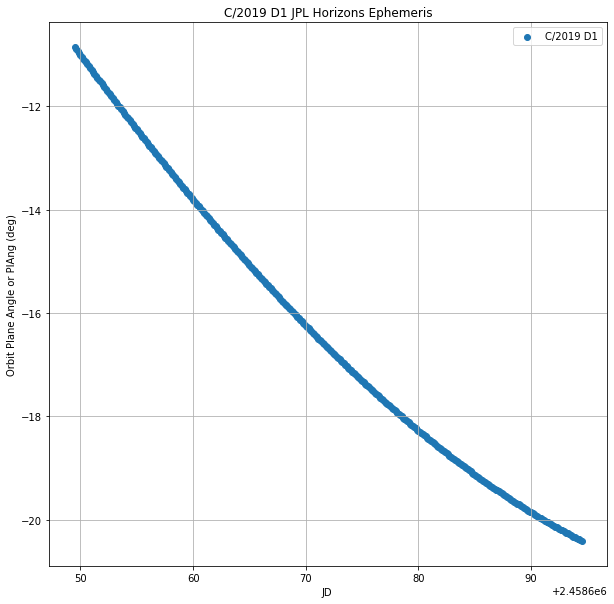

In [13]:
jd = eph.columns[eph.index_column('datetime_jd')]
plang = eph.columns[eph.index_column('OrbPlaneAng')]
# Plot OrbPlaneAng versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(jd, plang, label='C/2019 D1')
plt.xlabel('JD ')
plt.ylabel('Orbit Plane Angle or PlAng (deg)')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-plang.png')
plt.show()


<Figure size 432x288 with 0 Axes>

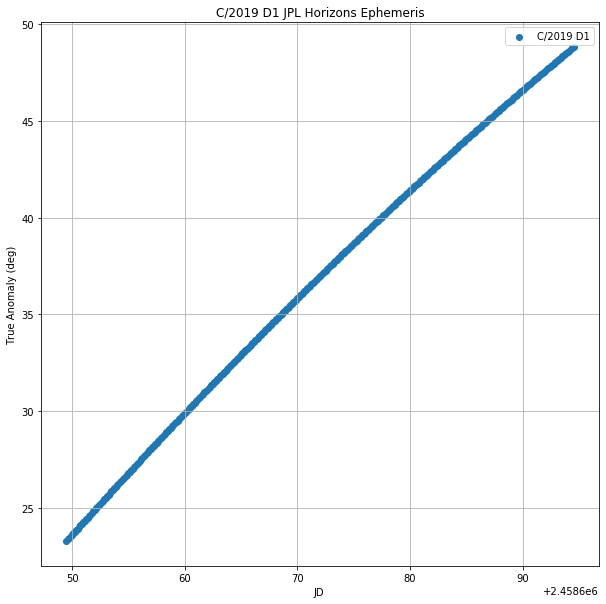

In [48]:
jd = eph.columns[eph.index_column('datetime_jd')]
trueanomaly = eph.columns[eph.index_column('true_anom')]
# Plot true_anom versus julian date  from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(jd, trueanomaly, label='C/2019 D1')
plt.xlabel('JD ')
plt.ylabel('True Anomaly (deg)')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-trueanomaly.png')
plt.show()


<Figure size 432x288 with 0 Axes>

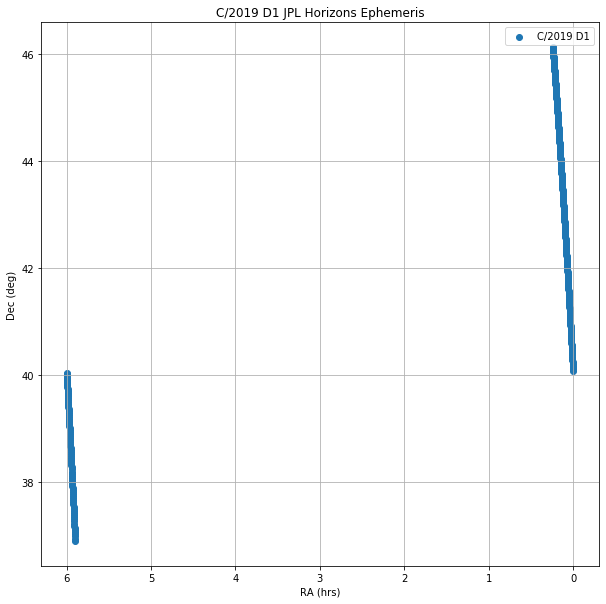

In [14]:
ra = eph.columns[eph.index_column('RA')]
rahrs = eph.columns[eph.index_column('RA')]/60
dec = eph.columns[eph.index_column('DEC')]
# Plot sky coordinates RA and Dec from ephemeris
plt.clf()
plt.figure(figsize=(10,10))
# invert RA axis since RA increases toward the east 
plt.gca().invert_xaxis()
plt.title('C/2019 D1 JPL Horizons Ephemeris')
plt.grid(True)
plt.scatter(rahrs, dec, label='C/2019 D1')
plt.xlabel('RA (hrs)')
plt.ylabel('Dec (deg)')
# legend location rotates about +x axis
# 1 is upperright
# 2 is upperleft
# 3 is lowerleft
# 4 is lower right
plt.legend(loc=1)
plt.savefig('ephem-RA Dec.png')
plt.show()
